# Modeling: K-Nearest Neighbors & Credit Card Fraud, Refined Dataset
 
Refer to our Exploratory or Cleaning Notebooks for details on the dataset:
1. ./clean_CC-fraud.ipynb
2. ./EDA-FS_CC-fraud.ipynb
 
In this notebook, we will explore how well we can predict credit card fraud using K-Nearest Neighbors on a subset of credit card data that is balanced in order to have an equal number of fraud cases and legitimate cases. We will fit two models:
1. A model that uses all available features
2. A model using selected features that demonstrate several thresholds of correlation to our classifications

## **1.** Imports & Settings

In [ ]:
import pandas as pd
import numpy as np

# model and score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

# plot
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)

---

## **2.** Load Data
Here we load the data from Google Drive, but the data can also be accessed from a realtive path for use with Jupyter Notebooks/Lab.

### **2.1.** Load Data w/ Jupyter Notebooks/Lab
```
# Run this code if using Jupyter Notebooks/Lab
# file_name = 'power_sub.csv'
# file_name = 'robust_sub.csv'
file_name = 'minmax_sub.csv'

df = pd.read_csv(f'./data/{file_name')
```

### **2.2.** Access & Load Data w/ Google Drive

In [ ]:
# Run this cell if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to test each of our scaling methods, we will uncomment our target method and run the notebook. The results of each run will be saved to a CSV file for review.

In [ ]:
# file_name = 'power_sub.csv'
# file_name = 'robust_sub.csv'
file_name = 'minmax_sub.csv'


path = f'/content/drive/MyDrive/Colab Notebooks/KNN_creditCardFraud/data/{file_name}'
df = pd.read_csv(path)

## **3.** Detail and View Data

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.391802,0.325737,0.714305,0.272772,0.760087,0.199154,0.647856,0.229537,0.581016,0.312623,0.172602,0.788604,0.118973,0.256920,0.116628,0.545121,0.120095,0.150551,0.159939,0.775710,0.482446,0.580724,0.448999,0.674650,0.336078,0.696673,0.475515,0.567968,0.301685,0.095061,1
1,0.551165,0.312393,0.754219,0.222545,0.758995,0.172057,0.635227,0.237333,0.601522,0.269512,0.166853,0.801806,0.128164,0.551375,0.096810,0.452733,0.181820,0.163300,0.190856,0.607100,0.506700,0.578707,0.416152,0.649533,0.398726,0.664550,0.717544,0.672750,0.228677,0.762977,1
2,0.369051,0.223786,0.813508,0.163270,0.724298,0.133990,0.577230,0.202351,0.694841,0.369187,0.205394,0.613843,0.185244,0.445617,0.183633,0.637331,0.228972,0.248822,0.239024,0.562007,0.545656,0.578487,0.386751,0.628932,0.493515,0.707314,0.417515,0.586901,0.308407,0.651576,1
3,0.411855,0.448044,0.612961,0.349479,0.670788,0.201419,0.714636,0.333409,0.534992,0.451695,0.232289,0.647835,0.272512,0.521314,0.203331,0.375371,0.279978,0.293364,0.329035,0.575518,0.660961,0.583822,0.402630,0.574246,0.482459,0.638321,0.608348,0.483191,0.348670,0.954690,1
4,0.970225,0.417406,0.730995,0.504141,0.415584,0.222843,0.746383,0.317650,0.532278,0.514468,0.298898,0.121163,0.534349,0.577895,0.448227,0.432053,0.631736,0.400495,0.434977,0.253458,0.430713,0.595701,0.426204,0.656532,0.695769,0.600439,0.194899,0.362679,0.267217,0.552063,0


---

## **4.** Train Model

First, let's define the class DataFrame that we'll use for both of our models.

In [ ]:
# declare our target variables 
# ('Class' is the response variable w/ val 1 in case of fraud and 0 otherwise.)
classes_df = df['Class']

### **4.1.** Model I: All Features

#### **4.1.1.** Split Data

Define our features DataFrame as all columns except for 'Class'.

In [ ]:
# features_df is our features matrix
features_df = df.drop('Class', axis=1)

print(f'Features \n{features_df.head().to_string()}\n')
print(f'Classifications \n{classes_df.head().to_string()}')

Features 
       Time        V1        V2        V3        V4        V5        V6        V7        V8        V9       V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28    Amount
0  0.391802  0.325737  0.714305  0.272772  0.760087  0.199154  0.647856  0.229537  0.581016  0.312623  0.172602  0.788604  0.118973  0.256920  0.116628  0.545121  0.120095  0.150551  0.159939  0.775710  0.482446  0.580724  0.448999  0.674650  0.336078  0.696673  0.475515  0.567968  0.301685  0.095061
1  0.551165  0.312393  0.754219  0.222545  0.758995  0.172057  0.635227  0.237333  0.601522  0.269512  0.166853  0.801806  0.128164  0.551375  0.096810  0.452733  0.181820  0.163300  0.190856  0.607100  0.506700  0.578707  0.416152  0.649533  0.398726  0.664550  0.717544  0.672750  0.228677  0.762977
2  0.369051  0.223786  0.813508  0.163270  0.724298  0.133990  0.577230  0.202351  0

Split data into our training and testing sets.

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, 
                                                    classes_df, 
                                                    test_size=0.2, 
                                                    random_state=65, 
                                                    stratify=classes_df)

#### **4.1.2.** Find Optimal Hyperparamaters
Below we use GridSearchCV to test combinations of our target parameters. Although we can adjust and even use multiple options for the scoring metric, we will use the default scoring along with two cross-validation folds to find our best parameters. This is essentially a brute-force option but as our dataset is relatively small, it does not take a significant amount of time.

In [ ]:
# define the hyperparameters and the possible values to test

# n_neighbors only tests odd numbers as an even number of neighbors 
# may result in an equal count of fraud and non-fraud neighbors
n_neighbors = np.arange(1, 51, 2)
weights = ['uniform', 'distance']

# minkowski with p=1 is equivalent to manhattan_distance
# minkowski with p=2 is equivalent to euclidean_distance
metric = ['minkowski']
p = np.arange(1, 4, 1)

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = np.arange(1, 51, 1)

# we can pass multiple scoring options to GridSearchCV
# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# define paramgrid as a dict of the above values and the model's 
# designation for the hyperparameters
paramgrid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)

# instantiate our model
knn = KNeighborsClassifier()

# instantiate GridSearchCV
grid = GridSearchCV(estimator=knn, 
                    param_grid=paramgrid, 
                    cv=2, 
                    n_jobs=-1, 
                    verbose=1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   29.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'p': array([1, 2, 3]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Below we visualize the results of our GridSearchCV, providing some comparative insights on the combinations of parameters we tested.

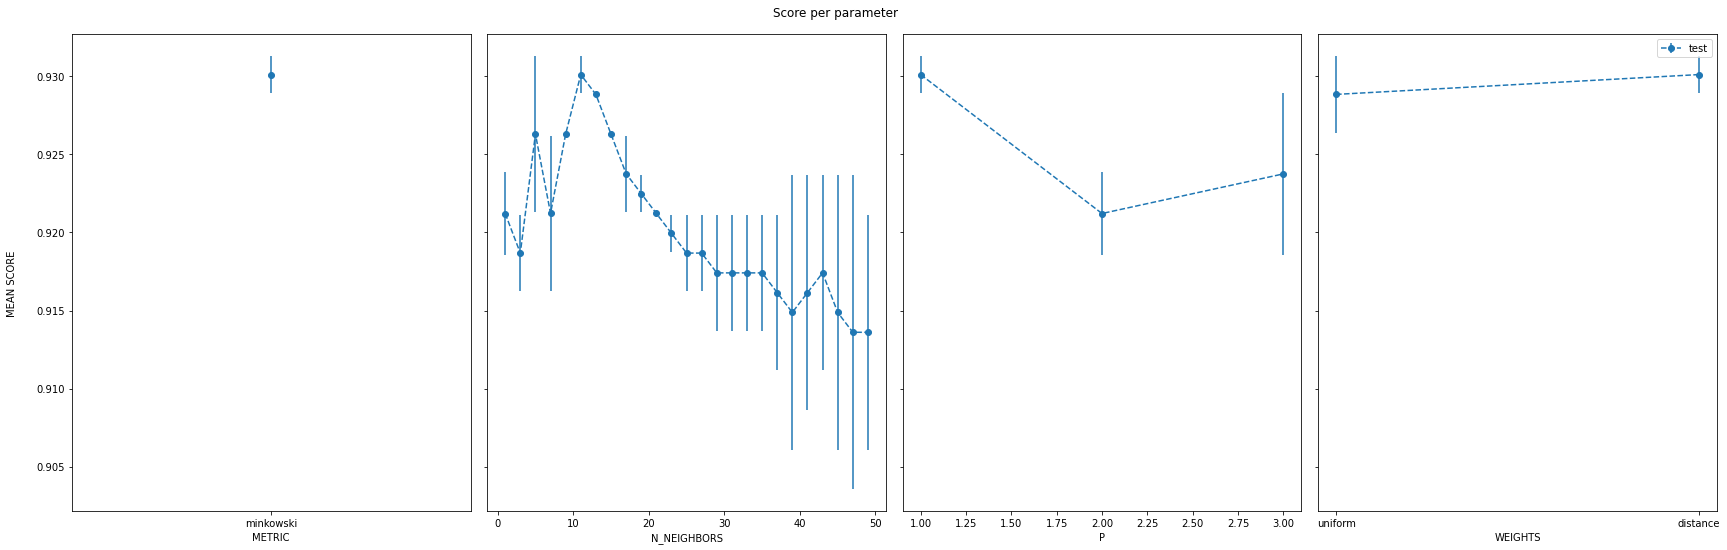

In [ ]:
# we'll use this again for our second model, define as function
def plot_search_results(grid):

    """
    Params: 
        grid: A trained GridSearchCV object.
    """

    # results from grid search
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    # means_train = results['mean_train_score']
    # stds_train = results['std_train_score']

    # get indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid
    plt.rcParams['figure.facecolor'] = 'white'

    # Plotting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all', 
                           figsize=(25,8))
    
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        # y_2 = np.array(means_train[best_index])
        # e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        # ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.tight_layout(rect=[.05, 0.03, 1, 0.95])
    plt.show()
    
plot_search_results(grid)

Next, we assign our best parameters to variables so that we can easily pass them to our final model.

In [ ]:
best_params = grid.best_params_
best_n_neighbors = best_params['n_neighbors']
best_weight = best_params['weights']
best_metric = best_params['metric']
best_p = best_params['p']

print(f'Best Params: {best_params} {grid.best_score_}')

results = grid.cv_results_

Best Params: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'} 0.9301158600379742


#### **4.1.3.** Instantiate w/ Optimal Hyperparameters
Passing our optimal hyperparameters to fit our final model.

In [ ]:
%%time
# instantiate the model with optimal neighbors
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, 
                           weights=best_weight, 
                           metric=best_metric, 
                           p=best_p)

# fit the model on the training data
knn.fit(X_train, y_train)

# make predictions with our test features
guesses = knn.predict(X_test)

guesses

CPU times: user 21.8 ms, sys: 0 ns, total: 21.8 ms
Wall time: 26.2 ms


#### **4.1.4** Evaluate
As part of our evaluation, we collect several scoring metrics and save them for review in our conclusion.

##### **4.1.4.1.** Scores

In [ ]:
# score our predictions against the actual classifications from our test set
accuracy = accuracy_score(y_test, guesses)
recall = recall_score(y_test, guesses)
precision = precision_score(y_test, guesses)
f1 = f1_score(y_test, guesses)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {f1}')

Accuracy: 0.9441624365482234
Recall: 0.8877551020408163
Precision: 1.0
F1: 0.9405405405405405


##### **4.1.4.2.** Confusion Matrix
A visual representation of our True and False Positives/Negatives.

Text(0.5, 15.0, 'Predicted label')

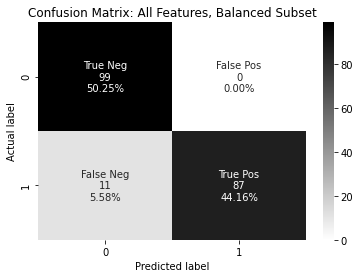

In [ ]:
cnf_matrix = confusion_matrix(y_test, guesses)

# create labels 
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

# create matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=labels, cmap="binary" , fmt='')

plt.title('Confusion Matrix: All Features, Balanced Subset', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### **4.1.4.3.** ROC-AUC Curve
The ROC-AUC curve is a performance measurement for our classifications at various threshold settings. KNN, however, does not have a threshold setting as some classification models do. In the case of KNN, the ROC is a curve representing the percentage of n-neighbors that agree with the final classification.
<br />
<br />
The AUC score represents the degree of separability—how well the model can distinguish between our classes.
<br />
<br />
Although we are not attempting to tune our model according to something like a threshold parameter, ROC-AUC is a good comparative measure of separability.

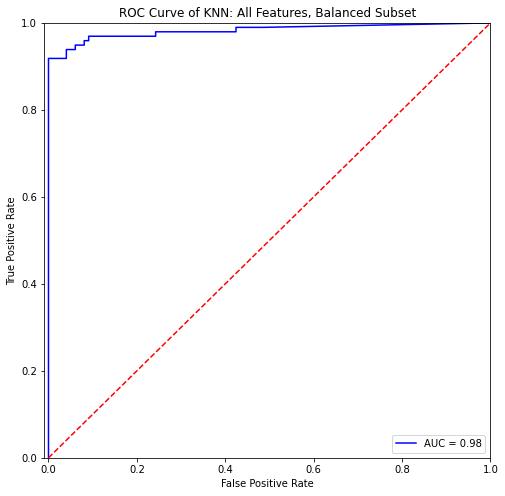

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

f, (ax) = plt.subplots(figsize=(8,8))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-.01, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN: All Features, Balanced Subset')
plt.show()

##### **4.1.4.4.** Save Results

In [ ]:
# define columns and values
results_data = {
        'transformer': file_name,
        'features': 'all',
        'features_note': 'n/a',
        'best_k': best_n_neighbors,
        'best_weight': best_weight,
        'best_metric': best_metric,
        'best_p': best_p,
        'accuracy': accuracy,
        'recall': recall, 
        'precision': precision,
        'f1': f1,
        'auc': roc_auc
        } 

# create and view dataframe
results_df = pd.DataFrame(results_data, index=[0])
results_df

,transformer,features,features_note,best_k,best_weight,best_metric,best_p,accuracy,recall,precision,f1,auc
0,minmax_sub.csv,all,n/a,11,distance,minkowski,1,0.944162,0.887755,1.0,0.940541,0.982426


In [ ]:
results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/KNN_creditCardFraud/data/results.csv', mode='a', header=False, index=False)

### **4.2.** Model II: Select Features
We've defined several feature sets to test by commenting/uncommenting the target code block. All results are saved to CSV below.
<br />
<br />
In order to keep track of our results, feature notes are included alongside each set. A correlation coefficient >= magnitude .20, for example, refers to our Correlation Matrix and any value less than -.20 or greater than .20.

In [ ]:
features_note = 'corr_coef >= mag .20'
select_features_df = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 
                         'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19']]

# features_note = 'corr_coef >= mag .30'
# select_features_df = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 
#                          'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]

# features_note = 'corr_coef >= mag .40'
# select_features_df = df[['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 
#                          'V12', 'V14', 'V16', 'V17', 'V18']]

# features_note = 'corr_coef >= mag .50'
# select_features_df = df[['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 
#                          'V17']]

# features_note = 'neg corr_coef >= mag .30'
# select_features_df = df[['V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10','V12', 'V14', 
#                          'V16', 'V17', 'V18']]


print(f'Features \n{select_features_df.head().to_string()}\n')
print(f'Classifications \n{classes_df.head().to_string()}')

Features 
         V1        V3        V5        V6        V7        V9       V10       V12       V14       V16       V17       V18
0  0.325737  0.272772  0.199154  0.647856  0.229537  0.312623  0.172602  0.118973  0.116628  0.120095  0.150551  0.159939
1  0.312393  0.222545  0.172057  0.635227  0.237333  0.269512  0.166853  0.128164  0.096810  0.181820  0.163300  0.190856
2  0.223786  0.163270  0.133990  0.577230  0.202351  0.369187  0.205394  0.185244  0.183633  0.228972  0.248822  0.239024
3  0.448044  0.349479  0.201419  0.714636  0.333409  0.451695  0.232289  0.272512  0.203331  0.279978  0.293364  0.329035
4  0.417406  0.504141  0.222843  0.746383  0.317650  0.514468  0.298898  0.534349  0.448227  0.631736  0.400495  0.434977

Classifications 
0    1
1    1
2    1
3    1
4    0


#### **4.2.1** Split Data
Split our data in to training and test sets.

In [ ]:
## Split data into training and testing sets
X_cur_train, X_cur_test, y_cur_train, y_cur_test = train_test_split(select_features_df, 
                                                                    classes_df, 
                                                                    test_size=0.2, 
                                                                    random_state=65, 
                                                                    stratify=classes_df)

#### **4.2.2.** Find Optimal Hyperparamaters
Below we use GridSearchCV to test combinations of our target parameters. Although we can adjust the scoring method and even use multiple options, we will use the default scoring along with two cross-validation folds to find our best parameters. This is essentially a brute-force option but as our dataset is relatively small, it does not take a significant amount of time.

In [ ]:
# define the hyperparameters and the possible values to test

# n_neighbors only tests odd numbers as an even number of neighbors 
# may result in an equal count of fraud and non-fraud neighbors
n_neighbors = np.arange(1, 51, 2)
weights = ['uniform', 'distance']

# minkowski with p=1 is equivalent to manhattan_distance
# minkowski with p=2 is equivalent to euclidean_distance
metric = ['minkowski']
p = np.arange(1, 4, 1)

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = np.arange(1, 51, 1)

# we can pass multiple scoring options to GridSearchCV
# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# define paramgrid as a dict of the above values and the model's 
# designation for the hyperparameters
paramgrid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)

# instantiate our model
knn = KNeighborsClassifier()

# instantiate GridSearchCV
sub_grid = GridSearchCV(estimator=knn, param_grid=paramgrid, cv=2, n_jobs=-1, verbose=1)

In [ ]:
sub_grid.fit(X_cur_train, y_cur_train)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.7s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'p': array([1, 2, 3]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

We will assign our best parameters to variables so that we can easily pass them to our final model.

In [ ]:
best_params = sub_grid.best_params_
best_n_neighbors = best_params['n_neighbors']
best_weight = best_params['weights']
best_metric = best_params['metric']
best_p = best_params['p']

print(f'The Best Params: {best_params} {sub_grid.best_score_}')

results = sub_grid.cv_results_

The Best Params: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'} 0.9364642668009971


Below we visualize the results of our GridSearchCV, providing some comparative insights on the combinations of parameters we tested.

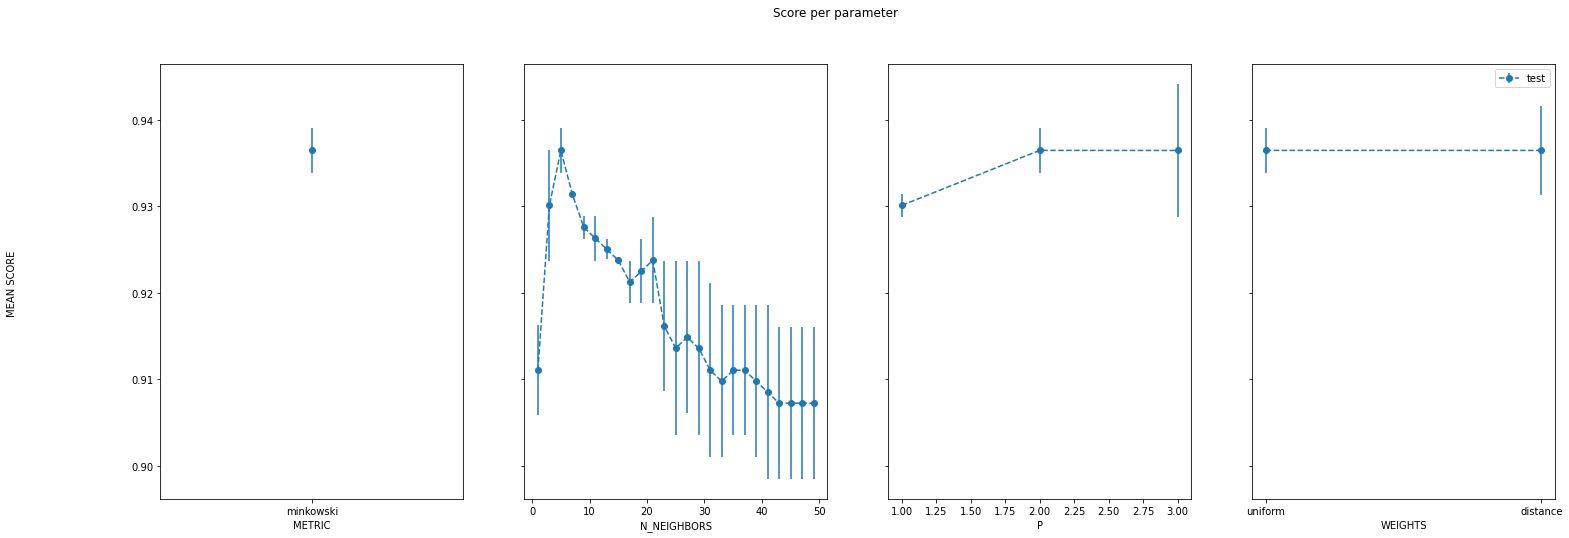

In [ ]:
# use function defined in 4.1.2.
plot_search_results(sub_grid)

#### **4.2.3.** Instantiate w/ Optimal Hyperparameters

In [ ]:
%%time
# Instantiate the model with optimal neighbors. 
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, 
                           weights=best_weight, 
                           metric=best_metric, 
                           p=best_p)

# Fit the model on the training data.
knn.fit(X_cur_train, y_cur_train)

# make predictions with our test features
cur_guesses = knn.predict(X_cur_test)

cur_guesses

CPU times: user 20.3 ms, sys: 0 ns, total: 20.3 ms
Wall time: 22.7 ms


#### 4.2.4. Evaluate
As part of our evaluation, we collect several scoring metrics and save them for review in our conclusion.

##### 4.2.4.1. Scores

In [ ]:
# score our predictions against the actual classifications from our test set
accuracy = accuracy_score(y_cur_test, cur_guesses)
recall = recall_score(y_cur_test, cur_guesses)
precision = precision_score(y_cur_test, cur_guesses)
f1 = f1_score(y_cur_test, cur_guesses)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {f1}')

Accuracy: 0.9390862944162437
Recall: 0.8979591836734694
Precision: 0.9777777777777777
F1: 0.9361702127659575


##### 4.2.4.2. Confusion Matrix
A visual representation of our True and False Positives/Negatives.

Text(0.5, 15.0, 'Predicted label')

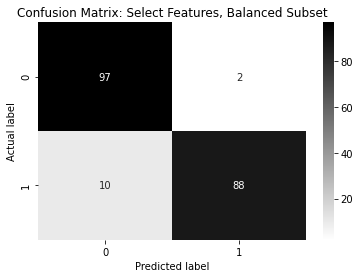

In [ ]:
cnf_matrix = confusion_matrix(y_cur_test, cur_guesses)

# create labels 
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

# create matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=labels, cmap="binary" , fmt='')

plt.title('Confusion Matrix: All Features, Balanced Subset', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### 4.2.4.3. ROC-AUC Curve
The ROC-AUC curve is a performance measurement for our classifications at various threshold settings. KNN, however, does not have a threshold setting as some classification models do. In the case of KNN, the ROC is a curve representing the percentage of n-neighbors that agree with the final classification.
 <br />
 <br />
The AUC score represents the degree of separability—how well the model can distinguish between our classes.
 <br />
 <br />
Although we are not attempting to tune our model according to something like a threshold parameter, ROC-AUC is a good comparative measure of performance.

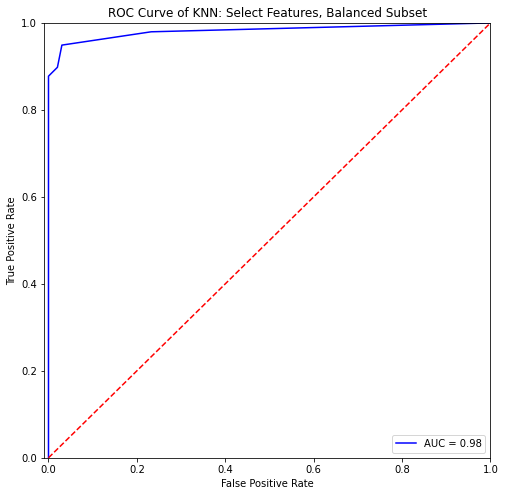

In [ ]:
y_cur_scores = knn.predict_proba(X_cur_test)
fpr, tpr, threshold = roc_curve(y_cur_test, y_cur_scores[:, 1])
roc_auc = auc(fpr, tpr)

f, (ax) = plt.subplots(figsize=(8,8))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-.01, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN: Select Features, Balanced Subset')
plt.show()

##### **4.2.4.4.** Save Results

In [ ]:
# define columns and values
sub_results_data = {
        'transformer': file_name,
        'features': str(select_features_df.columns.to_list()),
        'features_note': features_note,
        'best_k': best_n_neighbors,
        'best_weight': best_weight,
        'best_metric': best_metric,
        'best_p': best_p,
        'accuracy': accuracy,
        'recall': recall, 
        'precision': precision,
        'f1': f1,
        'auc': roc_auc
        } 

# create and view dataframe
sub_results_df = pd.DataFrame(sub_results_data, index=[0])
sub_results_df

,transformer,features,features_note,best_k,best_weight,best_metric,best_p,accuracy,recall,precision,f1,auc
0,minmax_sub.csv,"['V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V...",neg corr_coef >= mag .30,5,uniform,minkowski,2,0.939086,0.897959,0.977778,0.93617,0.981911


In [ ]:
# append results to csv
sub_results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/KNN_creditCardFraud/data/sub_results.csv', mode='a', header=False, index=False)

---

## **5.** Conclusion

### 5.1. Results
Load and view the results for the full-featured tests:

In [ ]:
results_path = '/content/drive/MyDrive/Colab Notebooks/KNN_creditCardFraud/data/results.csv'
results_df = pd.read_csv(results_path)

# sorted by recall, then F1
results_df.drop_duplicates().sort_values(['recall', 'f1'], ascending=False)

,transformer,features,features_note,best_k,best_weight,best_metric,best_p,accuracy,recall,precision,f1,auc
5,robust_sub.csv,all,NaN,3,uniform,minkowski,1,0.959391,0.928571,0.98913,0.957895,0.974799
0,power_sub.csv,all,NaN,5,distance,minkowski,1,0.959391,0.918367,1.00000,0.957447,0.976139
10,minmax_sub.csv,all,NaN,11,distance,minkowski,1,0.944162,0.887755,1.00000,0.940541,0.982426


Load and view the results for the feature-selected tests:

In [ ]:
sub_results_path = '/content/drive/MyDrive/Colab Notebooks/KNN_creditCardFraud/data/sub_results.csv'
sub_results_df = pd.read_csv(sub_results_path)

# sorted by recall, then F1
sub_results_df.sort_values(['recall', 'f1'], ascending=False)

,transformer,features,features_note,best_k,best_weight,best_metric,best_p,accuracy,recall,precision,f1,auc
11,minmax_sub.csv,"['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9...",corr_coef >= mag .30,3,uniform,minkowski,2,0.959391,0.928571,0.989130,0.957895,0.978819
0,power_sub.csv,"['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9...",corr_coef >= mag .20,3,distance,minkowski,1,0.954315,0.928571,0.978495,0.952880,0.983921
2,power_sub.csv,"['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V...",corr_coef >= mag .40,5,distance,minkowski,1,0.959391,0.918367,1.000000,0.957447,0.986858
6,robust_sub.csv,"['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9...",corr_coef >= mag .30,5,distance,minkowski,1,0.954315,0.918367,0.989011,0.952381,0.987631
8,robust_sub.csv,"['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14',...",corr_coef >= mag .50,5,distance,minkowski,3,0.954315,0.918367,0.989011,0.952381,0.977221
3,power_sub.csv,"['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14',...",corr_coef >= mag .50,3,uniform,minkowski,3,0.949239,0.918367,0.978261,0.947368,0.975933
7,robust_sub.csv,"['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V...",corr_coef >= mag .40,5,distance,minkowski,1,0.949239,0.918367,0.978261,0.947368,0.987322
9,robust_sub.csv,"['V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V...",neg corr_coef >= mag .30,3,uniform,minkowski,1,0.949239,0.918367,0.978261,0.947368,0.990260
1,power_sub.csv,"['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9...",corr_coef >= mag .30,3,uniform,minkowski,1,0.944162,0.918367,0.967742,0.942408,0.983302
4,power_sub.csv,"['V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V...",neg corr_coef >= mag .30,3,uniform,minkowski,1,0.944162,0.918367,0.967742,0.942408,0.979489


### **5.2.** Results Analysis
Above, we have a number of models with their own strengths and weaknesses to assess. We've recorded the results of several scoring methods, defined below, not just to compare but also as an exercise in considering their individual values in the context of our goal: identify instances of fraud.
 
> **Accuracy** is a simple ratio of correctly predicted observations to total observations or the total number of predictions our model guessed correctly <br /><br />
>$$ Accuracy = \frac{True Positives + True Negatives}{True Positives + False Positives + False Negatives + True Negatives}$$
 
<br />
<br />
 
>**Precision** evaluates how precise a model is in predicting positive labels. It is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision is relative to a low false-positive rate.<br /><br />
>$$ Precision = \frac{True Positives}{True Positives + False Positives}$$
 
<br />
<br />
 
>**Recall** (Sensitivity) represents the percentages of true positives our model correctly identified. The ratio of correctly predicted positive observations to all observations in the actual class.<br /><br />
>$$ Recall = \frac{True Positives}{True Positives + False Negatives}$$
 
<br />
<br />
 
>**F1 Score** is the weighted average of Precision and Recall. This score takes both false positives and false negatives into account.<br /><br />
>$$ F1 = \frac{2*(Recall * Precision)}{Recall + Precision}$$
 
<br />
<br />
 
The highest value for these metrics is 1, representing a perfect score.
<br />
<br />
When considering what is important in identifying credit card fraud, we pay special attention to Recall, as false negatives represent instances of fraud that we were unable to identify. In a practical sense, if we have cases of false positives, the cost is, potentially, an employee auditing a particular transaction whereas a false negative is an instance of successful theft.
<br />
<br />
We must also consider the results of our tests with the dataset using all features. While, in this instance, the best-performing model's scores are nearly identical to our feature-selected model's performance, we do run the risk of noise and less separability when we include features that do not contribute significantly to the final result. We would also see a greater appreciation for dimensionality reduction if working with a larger dataset. A trimmed dataset would see significantly faster training times by comparison to a dataset with more dimensions.
<br />
<br />
With that in mind, we would move forward with the feature-selected model at index #11 above. This particular model took data that was scaled with the MinMax scalar and used only features with a correlation coefficient of magnitude .30 or greater. It not only scored the highest in Recall but also in F1 which also takes false negatives into account.


### 5.3. Final Thoughts


#### **5.3.1.** Size of Dataset
 
After creating our balanced subset, we were left with 984 total observations. The small size of the dataset proved to be forgiving in terms of the time it took to fit each model. It allowed us to test a wider range of scaling methods as well as a breadth of parameters with GridSearchCV without much thought for efficiency.
<br />
<br /> 
However, we must also consider that, although we used every observation of fraud, a different slice of legitimate transactions used alongside those observations of fraud would yield different scores. Though, I do not believe the results would be significantly different. One way to continue this experiment could involve changing our random_state values in the subsetting process, record those results, repeat and compare.


#### **5.3.2.** Reflecting on Methods
If I were to approach this project again, I would likely separate each model into individual notebooks. Currently, a single notebook with both an all-features and a feature-selected model is quite large.
<br />
<br />
Additionally, I would consider a more efficient method for testing our alternatively scaled data sets as well as our different sets of selected features.
<br />
<br />
Due to the small size of the dataset, we had the opportunity to use methods and explore variables that we may not consider for a significantly larger dataset for concerns of time. GridSearchCV, for example, may be optimized to test fewer, strategically selected parameters.

#### **5.3.3.** Alternatives to K-Nearest Neighbors
 
I chose to use K-Nearest Neighbors for this project because it was the particular model that I wanted to explore and learn more about at the time. If I were to pursue a more effective model, I would consider logistic regression. Although KNN performs well in the context of credit card fraud, we should place a higher value on the ability to eliminate false negatives. Using a classification model such as logistic regression allows us to easily adjust the probability threshold, effectively raising the bar for what is considered a legitimate transaction. Whereas we see a recall score of .93 with KNN, we could use log regression, consult the ROC-AUC curve and find a threshold that would lower or eliminate false negatives with the least possible cost to other scoring metrics.